Fujita, K.S., Ancona, Z.H., Kramer, L.A., Straka, M., Gautreau, T.E., Garrity, C.P., Robson, D., Diffendorfer, J.E., and Hoen, B., 2023, United States Large-Scale Solar Photovoltaic Database (v2.0, August, 2024): U.S. Geological Survey and Lawrence Berkeley National Laboratory data release, https://doi.org/10.5066/P9IA3TUS.

In [17]:
import sys, os
import pandas as pd
import numpy as np
import requests
from IPython.display import display

In [39]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
lat, lon, year = 33.2164, -97.1292, 2010
# You must request an NSRDB api key from the link above
api_key = 'KNcuq3quebkAaHWTsVbvD8RGxK5U7XVZyt9W1W6k'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
# Choose year of data
year = '2012'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'true'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
name = 'Kaoru+Kure'
# Your reason for using the NSRDB.
reason_for_use = 'beta+testing'
# Your affiliation
affiliation = 'LeWagon'
# Your email address
email = 'kurekaoru@gmail.com'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [43]:
import requests

url = f"http://developer.nrel.gov/api/nsrdb/v2/solar/himawari7-download.json?api_key={api_key}&email={email}&"
url += f"wkt=POINT(179.9901 -16.96)&years={year}&interval={interval}"
#url += f"wkt=california&years={year}&interval={interval}"

print(url)


http://developer.nrel.gov/api/nsrdb/v2/solar/himawari7-download.json?api_key=KNcuq3quebkAaHWTsVbvD8RGxK5U7XVZyt9W1W6k&email=kurekaoru@gmail.com&wkt=california&years=2012&interval=30


In [ ]:
headers = {
    'content-type': "application/x-www-form-urlencoded",
    'cache-control': "no-cache"
}

response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

In [3]:
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,693763,-,-,-,33.21,-97.14,-6,203,-6,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [4]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

# take a look
print('shape:', df.shape)
df.head()


shape: (17520, 11)


/var/folders/5s/1x39g0012rvf58nzxhj8y2mw0000gn/T/ipykernel_62063/2229693191.py:5: FutureWarning: Non-integer 'periods' in pd.date_range, pd.timedelta_range, pd.period_range, and pd.interval_range are deprecated and will raise in a future version.
  df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,2.9,-2,167.60
2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,2.7,-2,169.78
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,2.5,-3,168.08
2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,2.4,-3,163.67
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,2.4,-4,158.14


In [5]:
# Print column names
print(df.columns.values)

['Year' 'Month' 'Day' 'Hour' 'Minute' 'GHI' 'DHI' 'DNI' 'Wind Speed'
 'Temperature' 'Solar Zenith Angle']


In [10]:
#import additional module for SAM simulation:
import site
# Use site.addsitedir() to set the path to the SAM SDK API. Set path to the python directory.
site.addsitedir('/Applications/sam-sdk-2015-6-30-r3/languages/python/')
import pysam.PySSC as pssc
# Download PySAM here: https://pypi.org/project/NREL-PySAM/

ssc = pssc.PySSC()

# Resource inputs for SAM model:
# Must be byte strings
wfd = ssc.data_create()
ssc.data_set_number(wfd, b'lat', lat)
ssc.data_set_number(wfd, b'lon', lon)
ssc.data_set_number(wfd, b'tz', timezone)
ssc.data_set_number(wfd, b'elev', elevation)
ssc.data_set_array(wfd, b'year', df.index.year)
ssc.data_set_array(wfd, b'month', df.index.month)
ssc.data_set_array(wfd, b'day', df.index.day)
ssc.data_set_array(wfd, b'hour', df.index.hour)
ssc.data_set_array(wfd, b'minute', df.index.minute)
ssc.data_set_array(wfd, b'dn', df['DNI'])
ssc.data_set_array(wfd, b'df', df['DHI'])
ssc.data_set_array(wfd, b'wspd', df['Wind Speed'])
ssc.data_set_array(wfd, b'tdry', df['Temperature'])

# Create SAM compliant object
dat = ssc.data_create()
ssc.data_set_table(dat, b'solar_resource_data', wfd)
ssc.data_free(wfd)

# Specify the system Configuration
# Set system capacity in MW
system_capacity = 4
ssc.data_set_number(dat, b'system_capacity', system_capacity)
# Set DC/AC ratio (or power ratio). See https://sam.nrel.gov/sites/default/files/content/virtual_conf_july_2013/07-sam-virtual-conference-2013-woodcock.pdf
ssc.data_set_number(dat, b'dc_ac_ratio', 1.1)
# Set tilt of system in degrees
ssc.data_set_number(dat, b'tilt', 25)
# Set azimuth angle (in degrees) from north (0 degrees)
ssc.data_set_number(dat, b'azimuth', 180)
# Set the inverter efficency
ssc.data_set_number(dat, b'inv_eff', 96)
# Set the system losses, in percent
ssc.data_set_number(dat, b'losses', 14.0757)
# Specify fixed tilt system (0=Fixed, 1=Fixed Roof, 2=1 Axis Tracker, 3=Backtracted, 4=2 Axis Tracker)
ssc.data_set_number(dat, b'array_type', 0)
# Set ground coverage ratio
ssc.data_set_number(dat, b'gcr', 0.4)
# Set constant loss adjustment
ssc.data_set_number(dat, b'adjust:constant', 0)

# execute and put generation results back into dataframe
mod = ssc.module_create(b'pvwattsv5')
ssc.module_exec(mod, dat)
df[b'generation'] = np.array(ssc.data_get_array(dat, b'gen'))

# free the memory
ssc.data_free(dat)
ssc.module_free(mod)

/Users/kaorukure/.pyenv/versions/3.10.6/envs/illuminating_horizons/lib/python3.10/site-packages/pysam/PySSC.py:175: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.pdll.ssc_data_set_number(c_void_p(p_data), c_char_p(name), c_number(value))
/Users/kaorukure/.pyenv/versions/3.10.6/envs/illuminating_horizons/lib/python3.10/site-packages/pysam/PySSC.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arr[:] = parr  # set all at once instead of looping


 0.00 %  @ 0
 0.67 %  @ 175
 1.33 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.66 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.32 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.65 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.98 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.31 %  @ 5075
19.98 %  @ 5250
20.64 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.97 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.30 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.63 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


In [9]:
import pysam.pyssc

ModuleNotFoundError: No module named 'pysam.pyssc'

In [11]:
# Divide sum of generation by the number of periods times the system size
df[b'generation'].sum() / (525600/int(interval) * system_capacity)

np.float64(0.17417720174399368)

In [12]:
# Total Energy:
df[b'generation'].sum()

np.float64(12206.338298219076)

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')

def nsrdb_plot(df, i):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    df['90 Degree Zenith'] = 90
    df[['GHI', 'DNI', 'DHI', 'Solar Zenith Angle', '90 Degree Zenith']][i:i+int(interval)].plot(ax=ax, figsize=(15,8), yticks=(np.arange(0,900,100)), style={'90 Degree Zenith': '--','Solar Zenith Angle': '-o', 'DNI': '-o', 'DHI': '-o', 'GHI': '-o'}, legend=False)
    df[b'generation'][i:i+30].plot(ax=ax2, yticks=(np.arange(0,4.5,0.5)), style={'generation': 'y-o'})
    ax.grid()
    ax.set_ylabel('W/m2')
    ax2.set_ylabel('kW')
    ax.legend(loc=2, ncol=5, frameon=False)
    ax2.legend(loc=1, frameon=False)

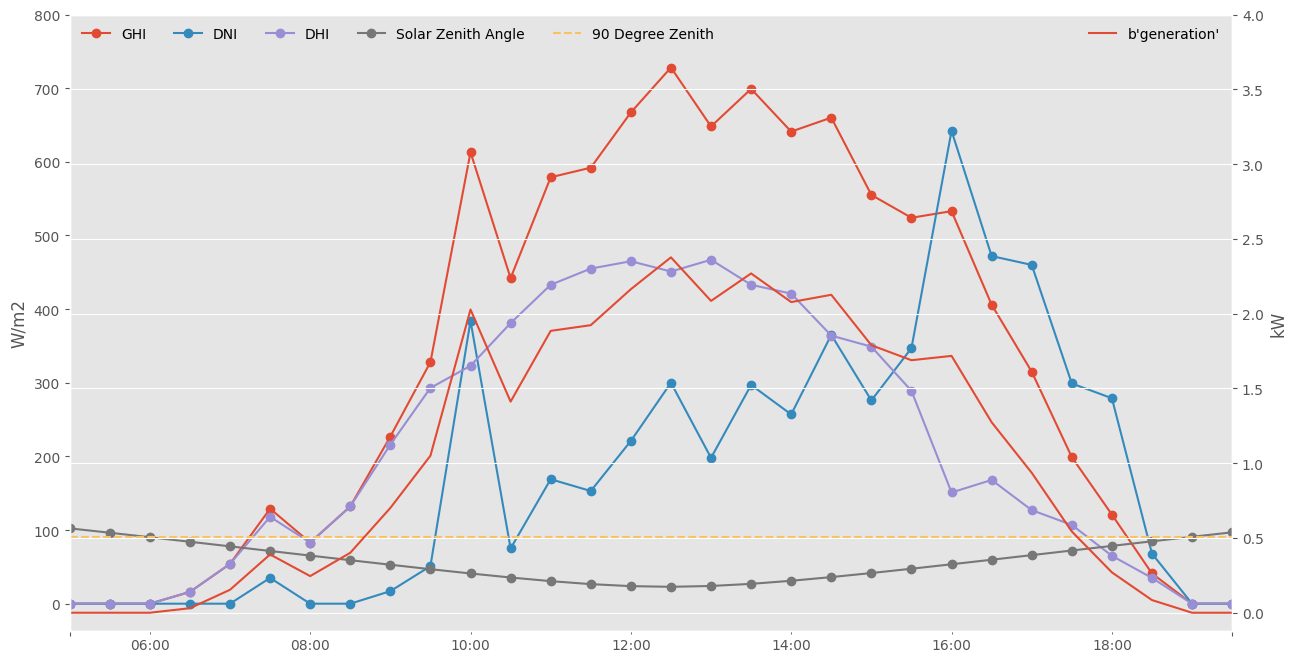

In [14]:
nsrdb_plot(df, 5050)